<a href="https://colab.research.google.com/github/Robsy14/Se-ales-y-sistemas/blob/main/PARCIAL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  PARCIA 1
# SEÑALES Y SISTEMAS

Lina Robsana Jamioy Tisoy

1006908436






#Preguntas

a). La distancia media entre dos senales periódicas $x1(t) ∈ R, C$  y  $x2(t) ∈ R, C$; se puede expresar a
partir de la potencia media de la diferencia entre ellas:


$$
d(x_1, x_2) = \bar{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t)-x_2(t)|^{2}~dt
$$

Sea $x_1(t)$ y $x_2(t$) dos señales como se muestra a continuación:
$$
x_{1}(t) = Ae^{j~w_{0}t}
$$
$$
x_{2}(t) = Be^{j~5w_{0}t}
$$

con $w_{0} =\frac{2π}{T}; T, A, B ∈ R^{+}$. Determine la distancia entre
las dos senales.


##Solución:

$$
d(x_1, x_2) = \bar{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} \int_T |Ae^{j~w_{0}t}-Be^{j~5w_{0}t}|^{2}~dt
$$


In [59]:
import sympy as sp

# Definición de los símbolos y variables
A, B, T = sp.symbols('A B T', real=True, positive=True)
w0 = 2 * sp.pi / T

# Definición de las señales x1(t) y x2(t)
x1 = A * sp.exp(sp.I * w0 * sp.symbols('t'))
x2 = B * sp.exp(sp.I * 5 * w0 * sp.symbols('t'))

# Calcular la suma de las señales
suma= x1 + x2


# Calcular la integral del valor absoluto al cuadrado de la suma con límites de 0 a T
integral_suma= sp.integrate(suma, ('t', 0, T))*-2/ T  # Integral con límites
#print (integral_suma)

# Cálculo de las potencias medias de las señales
Px1 = sp.integrate(sp.Abs(x1)**2, ('t', 0, T)) / T
#print (Px1)
Px2 = sp.integrate(sp.Abs(x2)**2, ('t', 0, T)) / T
#print (Px2)


# Cálculo de la distancia entre las señales
distance_squared = Px1 + Px2
limit_distance_squared = sp.limit(distance_squared, T, sp.oo)
#print (limit_distance_squared)

#se despeja la distancia entonces tenemos
distance = sp.sqrt(distance_squared)

# Mostrar la distancia entre las señales
print('\nLa distancia media entre las dos señales es:')
sp.pprint(distance)




La distancia media entre las dos señales es:
   _________
  ╱  2    2 
╲╱  A  + B  


b). Cual es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital con recuencia de muestreo de $5kHz$, aplicado a la senal continua $x(t) = 3 cos(1000πt) + 5 sin(2000πt) + 10 cos(11000πt)$?. Realizar la simulación del proceso de discretizacion. En caso de que la discretizacion no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.


#Solución

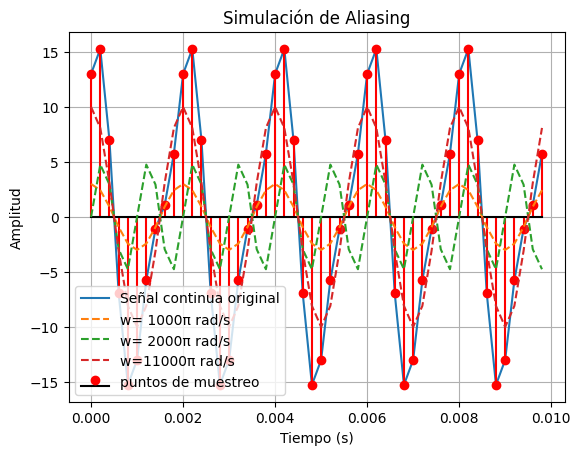

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal continua original
def x(t):
    return 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Parámetros de la simulación
Fs = 5000 # Frecuencia de muestreo
duration = 0.01  # Duración de la señal en segundos
t = np.linspace(0, duration, int(duration * Fs), endpoint=False)  # Intervalo de tiempo según Fs



# Gráfica de la señal continua original y puntos de muestreo
plt.plot(t, x(t), label='Señal continua original')  # Señal continua original
plt.stem(t, x(t), markerfmt='ro', linefmt='r-', basefmt='k-', label='puntos de muestreo')

#  funciónes separadas
plt.plot(t, 3 * np.cos(1000 * np.pi * t), '--', label='w= 1000π rad/s')
plt.plot(t, 5 * np.sin(2000 * np.pi * t), '--', label='w= 2000π rad/s')
plt.plot(t, 10 * np.cos(11000 * np.pi * t), '--', label='w=11000π rad/s')


plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.title('Simulación de Aliasing')
plt.show()

Se verificó en la resolución del problema que una frecuencia de muestreo de 5000 Hz provoca un fenómeno de aliasing, resultando en la pérdida de información.

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal continua
def x(t):
    return 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Parámetros de la simulación
duration = 0.01  # Duración de la señal en segundos
sampling_rate = 5000  # Frecuencia de muestreo en Hz

# Intervalo de tiempo de la simulación
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

# Muestreo de la señal continua
samples = x(t)
#print (samples)

c). Implemente una simulacion para encontrar la salida del sistema lineal e invariante al tiempo $H{·}$, con respuesta al escalon $ hϵ[n] = {2, 4, 1, 5, 0, 10}$, $ n ∈ Z$, ante la entrada
analoga en corriente $x(t) = 20(cos(t/3) + cos(t/4)) [A]$. A: Amperios. Incluya los condicionamientos necesarios de discretizacion y cuantización, asumiendo un microprocesador de 4 bits con entrada analoga de 4mA a 20mA.


Se define la señal de entrada x(t) y se discretiza para obtener una versión discreta de la señal.

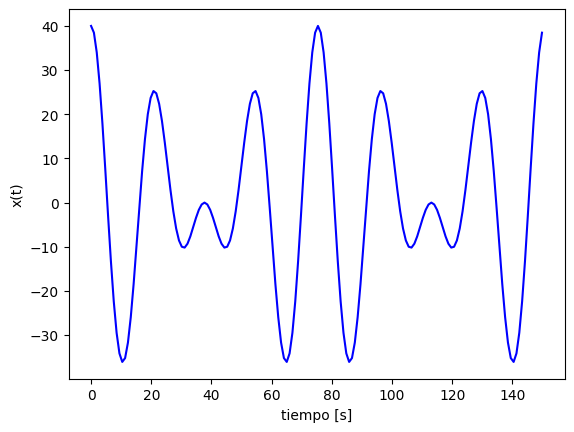

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal de entrada
A = 20
w1 = 1/3
w2 = 1/4
T1 = 2*np.pi/w1  # periodo 1
T2 = 2*np.pi/w2  # periodo 2
F1 = 1/T1    #  frecuencia 1
F2 =  1/T2   #  frecuencia 2
Fs = 20 * max(F1, F2)  #Aplicar y asegurar Nyquist
TT=24*np.pi  # Periodo total
Ts=1/Fs  #Periodo de muestreo


# Vector de tiempo discreto y señal discretizada
tv = np.arange(0, 2*TT,Ts) #Crea un vector de tiempo discreto.
xv = A * (np.cos(tv/3) + np.cos(tv/4))  #np.cos: Calcula el coseno de la señal de entrada.

# Gráfica de la señal discreta
plt.plot(tv, xv, "b")
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()


Cuantización de la señal discreta:
Se aplica el proceso de cuantización para ajustar los valores de la señal dentro de un rango específico.

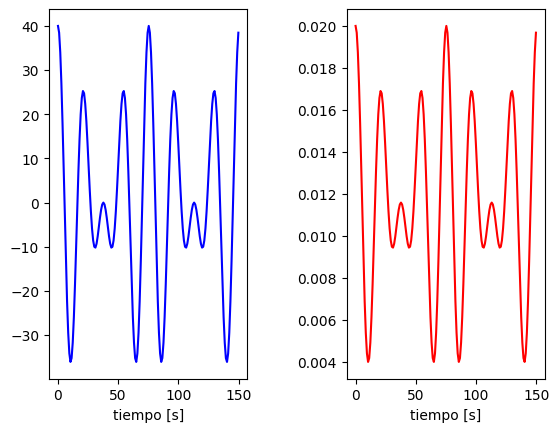

In [63]:
# Límites de cuantización
y_min = 0.004
y_max = 0.02

def my_ceropen(x, ymin=-5, ymax=5):
    xmax = max(x)
    xmin = min(x)
    m = (ymax - ymin) / (xmax - xmin)
    c = ymin - m * xmin
    yv = m * x + c
    return yv

# Aplicar cuantización
yv = my_ceropen(xv, y_min, y_max)
yv

# Graficar la señal cuantizada
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'b')
plt.xlabel('tiempo [s]')
plt.ylabel('')

plt.subplot(122)
plt.plot(tv,yv,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('')
plt.subplots_adjust(hspace=0.2,wspace=0.5)
plt.show()

In [64]:
#definimos las variables y funciones necesarias para la cuantización de la señal discreta.

nbits = 4
rmin = y_min
rmax = y_max
ve = np.linspace(rmin, rmax, 2**nbits)

def my_cuantizador(yn, vq):
    dn = np.abs(vq - yn)
    ind = np.argmin(dn)
    return vq[ind]

# Cuantización punto a punto
yq = np.array([my_cuantizador(val, ve) for val in yv])
#yq


#Graficación de señales cuantizadas:

<ipython-input-65-ba426e99d830>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(tv, yq, label='discreta', use_line_collection=True)  #Grafica la señal discreta de forma de escalón.


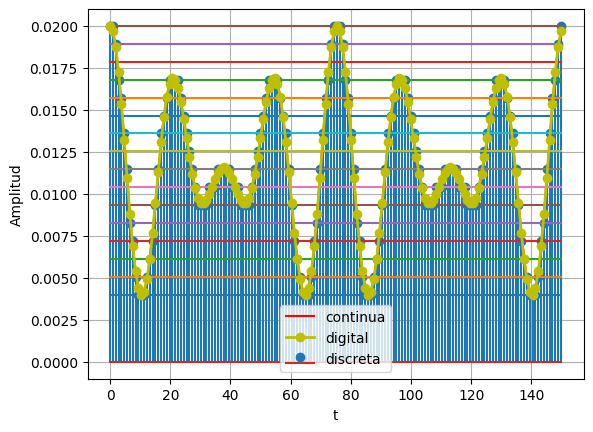

In [65]:

#Grafica de la señal
plt.plot(tv, yv, 'r', label='continua')
plt.stem(tv, yq, label='discreta', use_line_collection=True)  #Grafica la señal discreta de forma de escalón.


#estados de cuantización
for v in ve:
    plt.plot(tv, v * np.ones(len(tv)))


# Graficar señal Digital (discreta + cuantizada)
plt.plot(tv, yv, 'y', marker='o', label='digital', linewidth=2)


plt.xlabel('t')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()  #Agrega la cuadrícula al gráfico.
plt.show()


Una vez que se ha discretizado y cuantificado la señal de entrada, se procede a calcular la salida del sistema lineal e invariante en el tiempo (SLIT) utilizando la convolución entre la entrada digital y la respuesta al impulso. La respuesta al escalón proporcionada se utiliza para obtener la respuesta al impulso, que en el tiempo discreto se calcula como una resta.

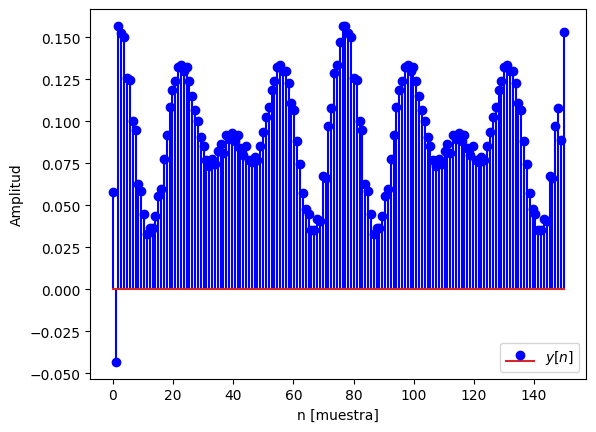

In [66]:
# Respuesta al escalón y respuesta al impulso
he = np.array([2, 4, 1, 5, 0, 10])
h = np.diff(he)  #Calcula la respuesta al impulso del SLIT.

# Convolución para obtener la salida del sistema
y = np.convolve(yq, h, mode='same')

# Graficar la salida del sistema
plt.stem(tv, y, 'b', label='$y[n]$')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()